In [1]:
# %%
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from scipy.stats import bernoulli
from svgpathtools import svg2paths
from svgpath2mpl import parse_path
# matplotlib parameters to ensure correctness of Chinese characters 
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.sans-serif']=['Arial Unicode MS', 'SimHei'] # Chinese font
plt.rcParams['axes.unicode_minus']=False # correct minus sign

plt.rcParams["font.size"] = 20
plt.rcParams["xtick.labelsize"] = 35
plt.rcParams["ytick.labelsize"] = 35

In [2]:
class UpdateDist:
    def __init__(self, ax,ax1):
        self.line, =ax.plot([],[],lw=5, color='r')
        self.ax = ax
        self.ax.set_xlim([0,0.14])
        self.ax.set_ylim([0,80])
        self.ax.set_ylabel("总检验平均次数z", fontsize=40) 
        self.ax.set_xlabel("化验阳性的概率p", fontsize=40)
        self.ax.text(0.01,0.25,"k=4", transform=self.ax.transAxes, fontsize=35, color='black',)
        # self.ax1.set_xlabel('Number of people tested', fontsize=20)
        # self.ax1.set_ylabel('Test accuracy', fontsize=20)
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        
        self.line1, =ax1.plot([],[],lw=5, color='g')
        self.ax1 = ax1
        self.ax1.set_xlim([0,0.14])
        self.ax1.set_ylim([0,35])
        self.ax1.set_ylabel("分组人数k", fontsize=40) 
        self.ax1.set_xlabel("化验阳性的概率p", fontsize=40)
        # self.ax1.set_xlabel('Number of people tested', fontsize=20)
        # self.ax1.set_ylabel('Test accuracy', fontsize=20)
        self.ax1.spines['top'].set_visible(False)
        self.ax1.spines['right'].set_visible(False)
        
        self.rects = ax1.barh([1,2,3], [0,0,0], )
        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            #for rect, h in zip(self.rects, [0,0]): 
                #rect.set_width(h)
            self.line, = self.ax.plot([], [], lw=5, color='r')
            self.line1, = self.ax1.plot([], [], lw=5, color='g')

        # Choose success based on exceed a threshold with a uniform pick
        # if np.random.rand(1,) < self.prob:
        #     self.success += 1
        # y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        # self.line.set_data(self.x, y)

        if i <= 99:
            # update curve
            xdata, ydata = self.line.get_data()
            xdata1, ydata1 = self.line1.get_data()
            p=i*0.14/100
            if len(xdata) == 0:
                xdata = [0]
                ydata = [25*(5-4*1**4)]
                xdata1 = [0]
                ydata1 = [37]
            else:
                xdata = np.append(xdata, p) 
                ydata = np.append(ydata,25*(5-4*(1-p)**4) ) 
                xdata1 =np.append(xdata1, p) 
                ydata1 =np.append(ydata1, math.log(p,0.562)) 
            self.line.set_data(xdata, ydata)
            self.line1.set_data(xdata1, ydata1)
        elif i==100:
            self.ax1.plot([0,0.14], [4,4], lw=3, ls="--",color='black')
            self.ax1.plot([0.10,0.10], [0,4], lw=3, ls="--",color='black')
            self.ax1.text(0.01,0.14,"k=4", transform=self.ax1.transAxes, fontsize=35, color='black',)
            self.ax1.text(0.73,0.01,"p=0.1", transform=self.ax1.transAxes, fontsize=35, color='black',)
            self.ax.plot([0.1,0.1], [0,70], lw=3, ls="--",color='black')
            self.ax.plot([0.1,0.14], [59,59], lw=3, ls="--",color='black')
            self.ax.text(0.95,0.68,"Z=59", transform=self.ax.transAxes, fontsize=35, color='black',)
            self.ax.text(0.73,0.01,"p=0.1", transform=self.ax.transAxes, fontsize=35, color='black',)
        return self.rects

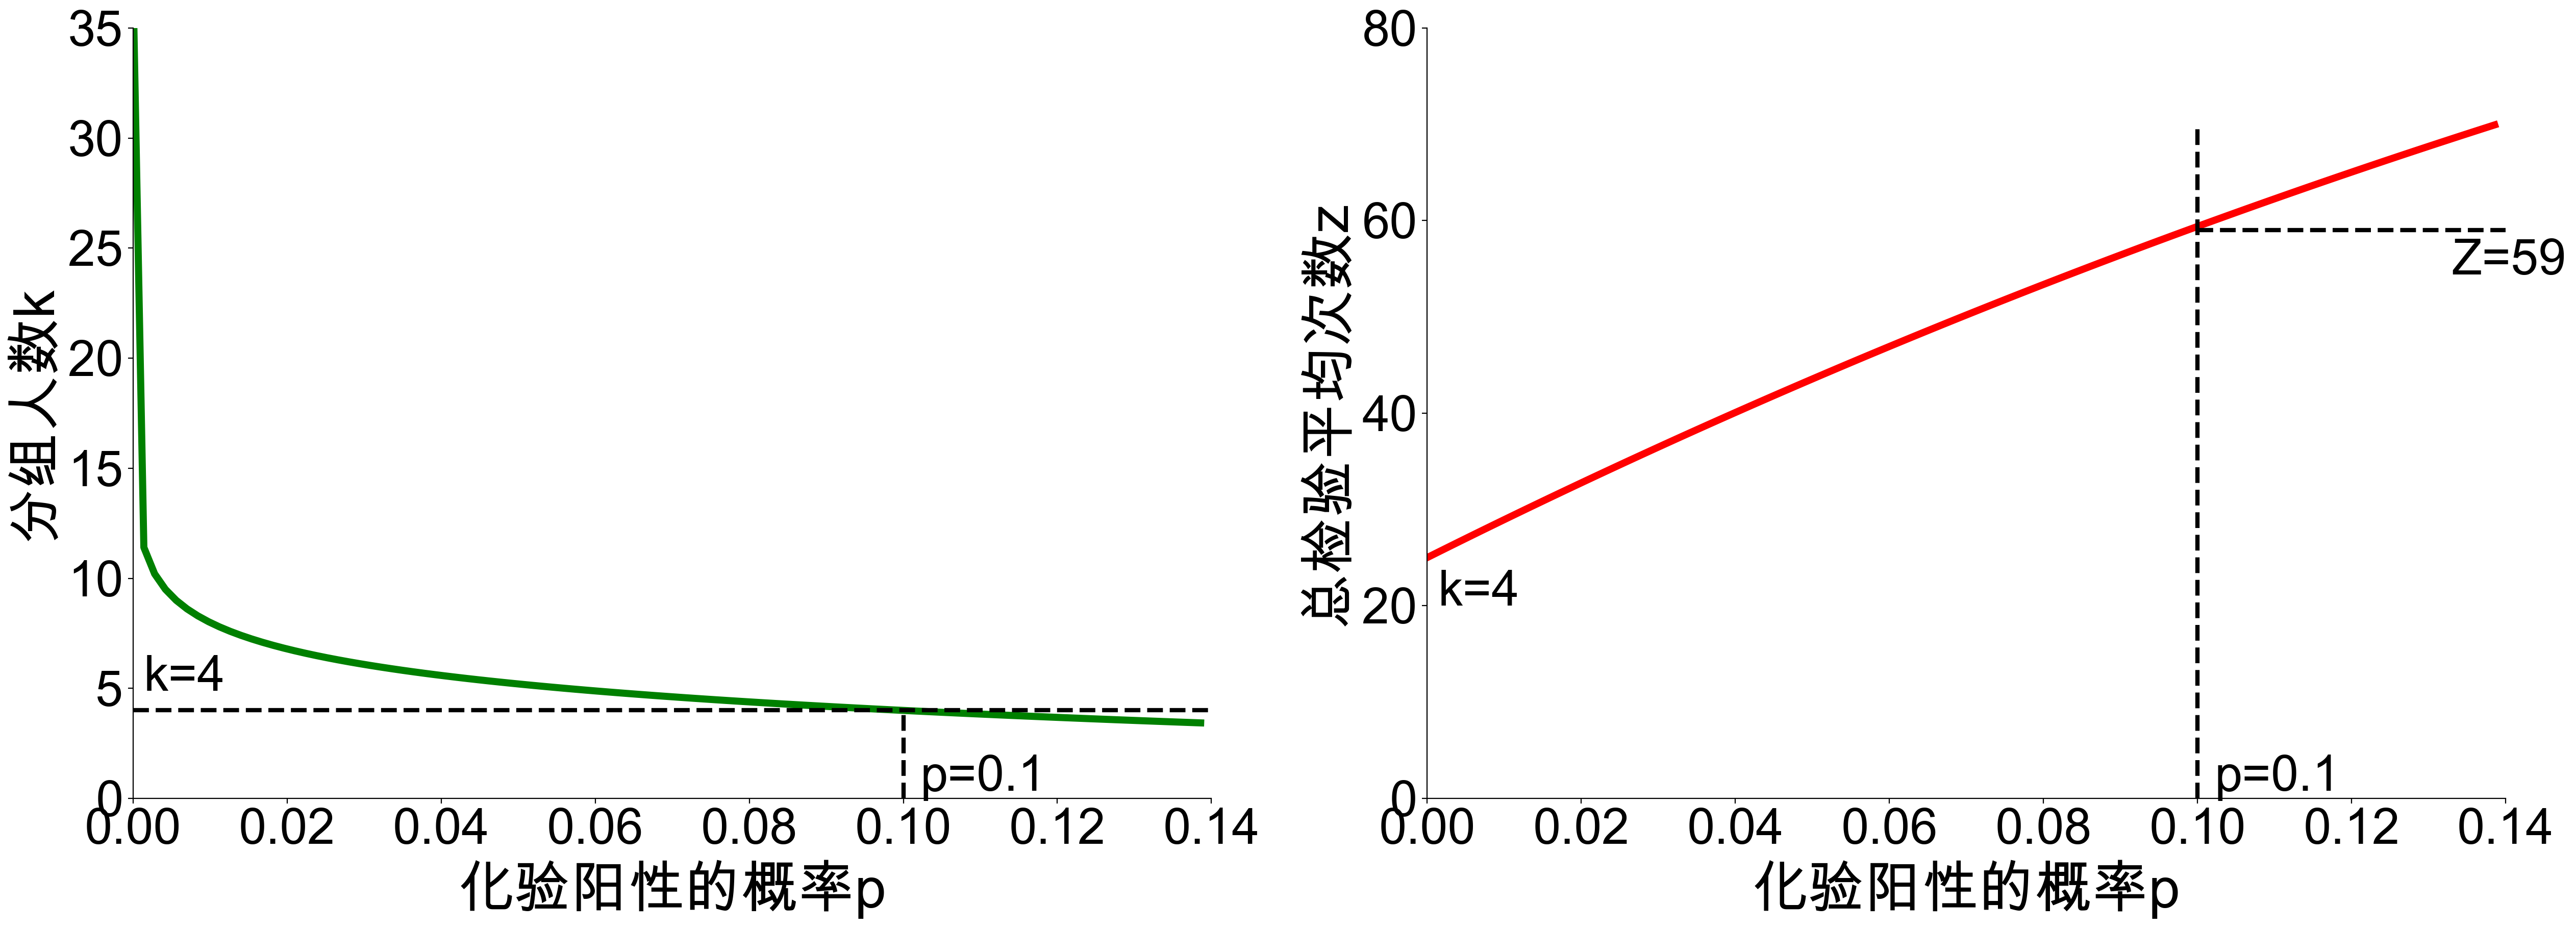

In [3]:
fig = plt.figure(figsize=(30,10),dpi=200)
#spec2 = gridspec.GridSpec(ncols=2, nrows=1, left=0.08, right=0.92, top=0.32, bottom=0.08, wspace=0.15, figure=fig)
ax1 = fig.add_subplot(1,2,2)
ax2 = fig.add_subplot(1,2,1)
ud = UpdateDist( ax1, ax2)
anim = FuncAnimation(fig, ud, frames=120, blit=True)
anim.save('curve_p.mp4', fps=10, dpi=200, codec='libx264', bitrate=-1, extra_args=['-pix_fmt', 'yuv420p'])